# **Machine Learning Project**

# **MARKETING CAMPAIGN FOR BANK PRODUCTS**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

# **Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

#1. Importing the libraries and dataset

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We have imorted required libraries for our initial coding part.We can import other libraries whenever they are required.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


We have imported our csv dataset file from local system by downloading it.

In [3]:
#loading the data into dataframe
import io
data_set = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

Now I have loaded data into dataframe using pandas.

In [4]:
#to display the top 10 rows
data_set.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


I have diplayed the top 10 rows of our data_set which contains 5000 rows

In [5]:
#to display the bottom 10 rows
data_set.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


I have displayed 10 rows from bottom from a data_set which contains 5000 rows 

In [6]:
#This tells me what coulmns are present in the data_set
data_set.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

I have displayed columns that are present in our data_set

Attributes that are present in the dataset are:


*   ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP code
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level. 1: Undergrad; 2: Graduate; 3:
  Advanced/Professional
* Mortgage: Value of house mortgage if any. ($000)
* Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?



**Checking Datatypes,Statistical Summary,Shape,Null Values:**

In [7]:
#to display datatypes of dataset
data_set.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

I have displayed datatypes of each variable that are present in our data_set.

In [8]:
#to display non-null rows for each coulmn
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


This displays whether our code has non-null rows for each column

In [9]:
# to display statistical summary that includes min, max, mean, std..etc
data_set.describe() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


This gives us the statistical summary like minimum, maximum,mean,std.. for each attribute or feature i.e., present in our data_set.

In [10]:
#finding the transpose of the statistical summary for better understanding
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


This also gives us the statistical summary but I have taken transpose for our better understanding.

In [11]:
# to check if there are any missing or null values in each column
data_set.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

This indicates that there are no missing or null values in each column

In [12]:
#finding the unique data from the dataset
data_set.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

This gives me information about uniqueness of each column from our data_set.This means there are 5000 unique ID(distinct),162 unique Income(distict),467 unique(distinct).... from our data_set

In [13]:
# to find the shape 
data_set.shape

(5000, 14)

This indicates that there are 5000 rows and 14 columns in our data_set

# 2.Cleaning irrelevent columns

We have to know identify the differnce between the data which is useful for our question/problem statement and data which is not useful for our question/problem statement.It is very clear that customer ID is not related to personal loan and experience column shows that there is negative values so we can consider that it represents fault data.So we can drop these columns.

In [14]:
# to check how many negative values in experience
data_set[data_set['Experience'] < 0]['Experience'].count()

52

From statistical summary we identified that the minimum value is negative in only one case i.e.,ecperience.So I am checking number of negative values present in experience

In [15]:
# Checking whether experience is correlated to age
experience = data_set['Experience']
age = data_set['Age']
correlation = experience.corr(age)
correlation 

0.9942148569683321

It shows that there is faulty data in experience in data_set.Now we can either correct the faulty data or check whether experience is correlated to any attriute and if it is highly correlated then we can simply remove experience.I have checked correlation between age and experience and found that they are highly correlated and now I can remove experieence and have age in my data_set

In [16]:
# dropping the experience and ID column 
data_set=data_set.drop(['ID','Experience'], axis=1 )
data_set.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


This is data_set which contains 12 columns and 5000 rows as I have removed two columns from our data_set.

In [17]:
# checking shape after removing two columns
data_set.shape

(5000, 12)

# 3.EDA

In [18]:
# check unique values of dataset
data_set.apply(lambda x: len(x.unique()))

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

This shows that Zip code has 467 distinct values.There are two types of variables in categorical variables.They are nominal and ordinal variables.It is a nominal variable which has too many levels.If we have to do coding based on this nominal variables then we will get 467 extra columns.Then we will have the problem of multi-collinearity.So it is better to drop Zip-code

In [19]:
# to drop zip code from our data
data_set=data_set.drop(['ZIP Code'],axis=1)
data_set.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


This is the data_set where we have removed Zip code from it

In [20]:
data_set.shape

(5000, 11)

Here we can see that there are only 11 columns in it

In [21]:
# to find number of people with zero mortgage
(data_set.Mortgage==0).sum()

3462

There are 3462 people with zero mortgage from our data_set

In [22]:
#number of people with 0 credit card spending per month
(data_set.CCAvg==0).sum()

106

There are 106 people with 0 Credit Card Average.

In [23]:
# Value count of all categorical columns
data_set['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

These are the value counts of family according to their strength in the family

In [24]:
data_set['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

This is the value counts based on their education

In [25]:
data_set['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

These are securuties account value counts

In [26]:
data_set['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

These are value counts based on their Credit Card

In [27]:
data_set['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

These are value counts based on the CD Account

In [28]:
data_set['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

These are the value counts based on online

# Univariate Analysis

Univariate analysis means analysing the attributes by considering only variable.

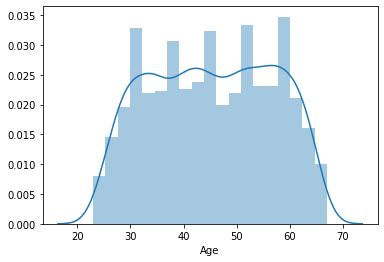

In [29]:
# Age
# It appears that it has symmetric distribution
ax1=sns.distplot(data_set.Age);
plt.show()

This is the Age plot and it appearing to be symmetric distribution based on the above distplot

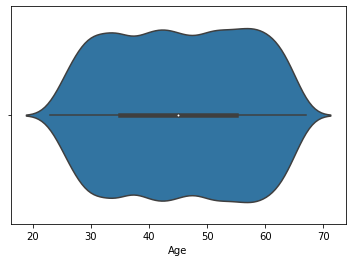

In [30]:
# violin plot of age from our data_set
ax2=sns.violinplot(data_set.Age);

This is the violin plot of age.It also shows the symmetric distribution

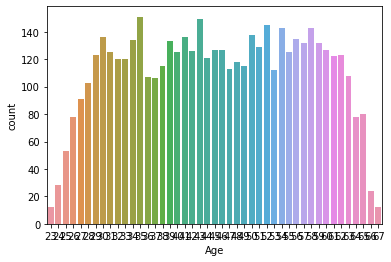

In [31]:
#countplot for age
ax3=sns.countplot(data_set.Age);

This is the countplot for Age from our data_set.It also represents the data almost symmetrically.

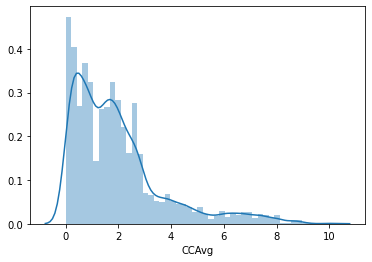

In [32]:
# CreditCard Avg
# It appears that it has right skew distribution
sns.distplot(data_set.CCAvg);

This is the univariate plot of Credit Card Avg from our data_set.It represents that it has right skew distribution.

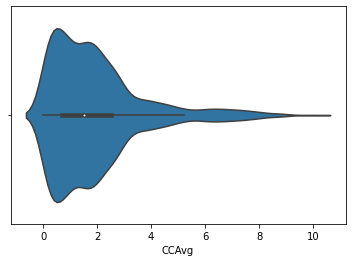

In [33]:
#violin plot of CCAvg 
sns.violinplot(data_set.CCAvg);

This violinplot represents that it has right skew distribution as we have it in the distplot

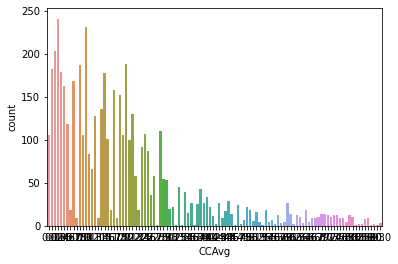

In [34]:
#countplot for CCAvg
sns.countplot(data_set.CCAvg);

The count plot of CCAvg represents that it has right skew distribution approximately.

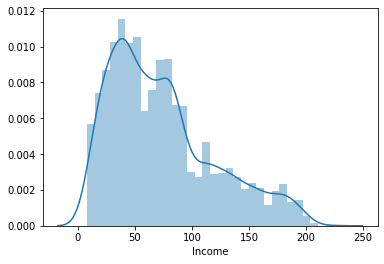

In [35]:
#income
# It appears that it has right skew distribution
sns.distplot(data_set.Income);

distplot of income represents that it has right skew distribution.Let us explore more plots to confirm it

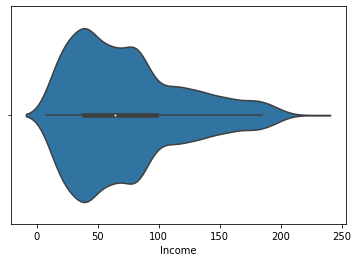

In [36]:
#violinplot for Income
sns.violinplot(data_set.Income);

The violinplot of the Income from our data_set represents that it has right skew distribution.

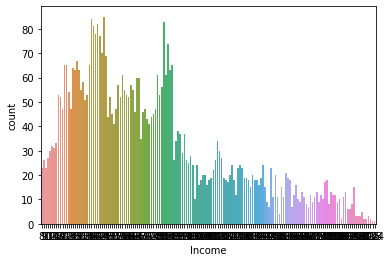

In [37]:
#countplot for Income for better confirmation
sns.countplot(data_set.Income);

Countplot,distplot and violinplot confirmed that it is approximately equal to right skew dsitribtuion

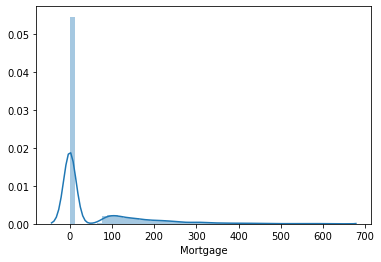

In [38]:
# Mortgage
# It seems it is highly skewed
sns.distplot(data_set.Mortgage);

The above distplot shows that it is highly skewed.Lets confirm it by using other plots

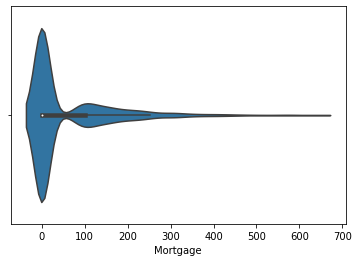

In [39]:
#violinplot for Mortgage
sns.violinplot(data_set.Mortgage);

The violinplot represents that it is highly skewed let us check it through boxplot

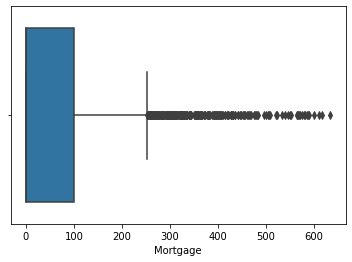

In [40]:
#boxplot for Mortgage
sns.boxplot(data_set.Mortgage);

distplot,violinplot and boxplot of Mortgage from our data_set shows us that it is highly skewed.

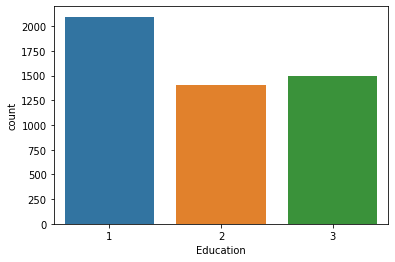

In [41]:
#Education
sns.countplot(data_set.Education);

This is the countplot of Education from our data_set

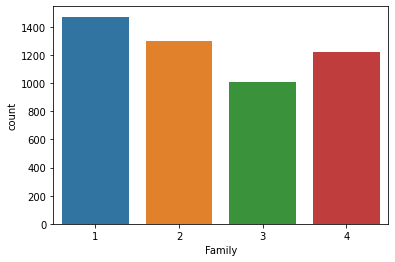

In [42]:
#Family
sns.countplot(data_set.Family);

This is the countplot of Family from our data_set.

# Bivariate Analysis

Bivariate analysis means comparing two varaibles and analysing them.There is another term fro comparing more than two variables and it is known as multivariate analysis

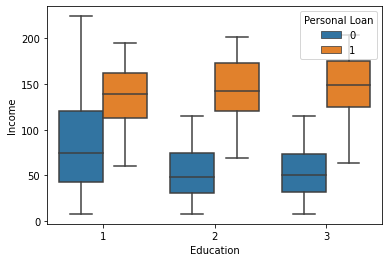

In [43]:
# Influence of Income and Education on Personal Loan
# It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data_set)

We have analysed influence of education and income on the personal loan and it seems that the customers whose education level is 1 is having more income.However customers who has taken personal loan have same income levels

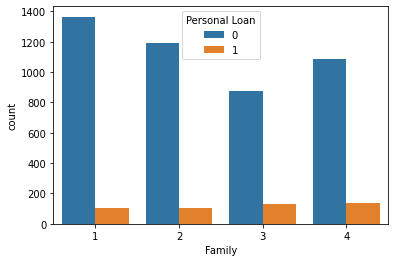

In [44]:
# Family influence over Personal Loan
# Family size does not have any impact in personal loan. 
# But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.
sns.countplot(x='Family',data=data_set,hue='Personal Loan');

We have analysed family influence over personal loan.Family size does not have any impact on personal loan.But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

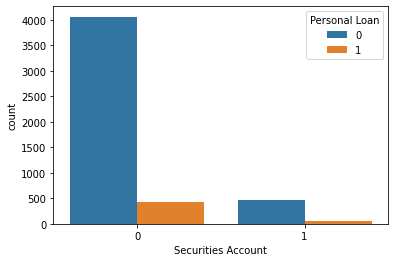

In [45]:
# Influence of Securities Account over personal loan
# Majority of customers who does not have loan have securities account
sns.countplot(x='Securities Account',data=data_set,hue='Personal Loan');

Influence of Securities account over personal loan.Majority of customers who does not have loan has securities account

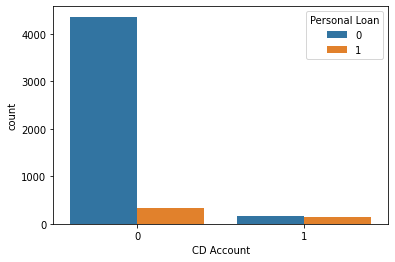

In [46]:
# Influence of CD Account on personal Loan 
#Customers who does not have CD account , does not have loan as well.
# This seems to be majority. But almost all customers who has CD account has loan as well
sns.countplot(x='CD Account',data=data_set,hue='Personal Loan');

We have done influence of CD Account on personal Loan.Customers who does not have CD account ,does not have loan as well.This seems to be majority. But almost all customers who has CD account has loan as well

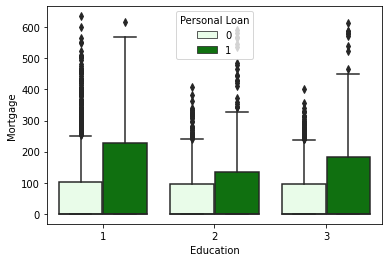

In [47]:
# Influence of Education and Mortgage over Personal Loan
# It seems that customer who do not have personal loan and customer who has personal loan have high mortgage
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data_set,color='green');

We have analyzed influence of education and mortgage over personal loan.It seems that customer who do not have personal loan and customer who has personal loan have high mortgage

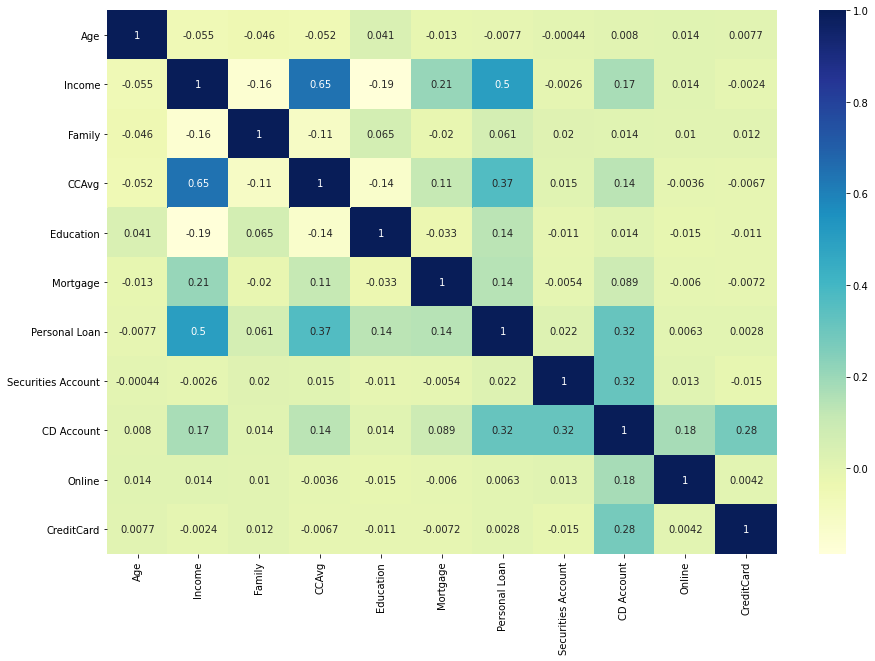

In [48]:
# previously we have seen that age and experience are correlated.
#After this it appears that credit card avg and income has a significant amount of correlation
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data_set.corr(),cmap='YlGnBu',annot=True);

previously we have seen that age and experience are correlated.
After this it appears that credit card avg and income has a significant amount of correlation that is 0.65 and it also appears that income and personal loan has a correlation of 0.5

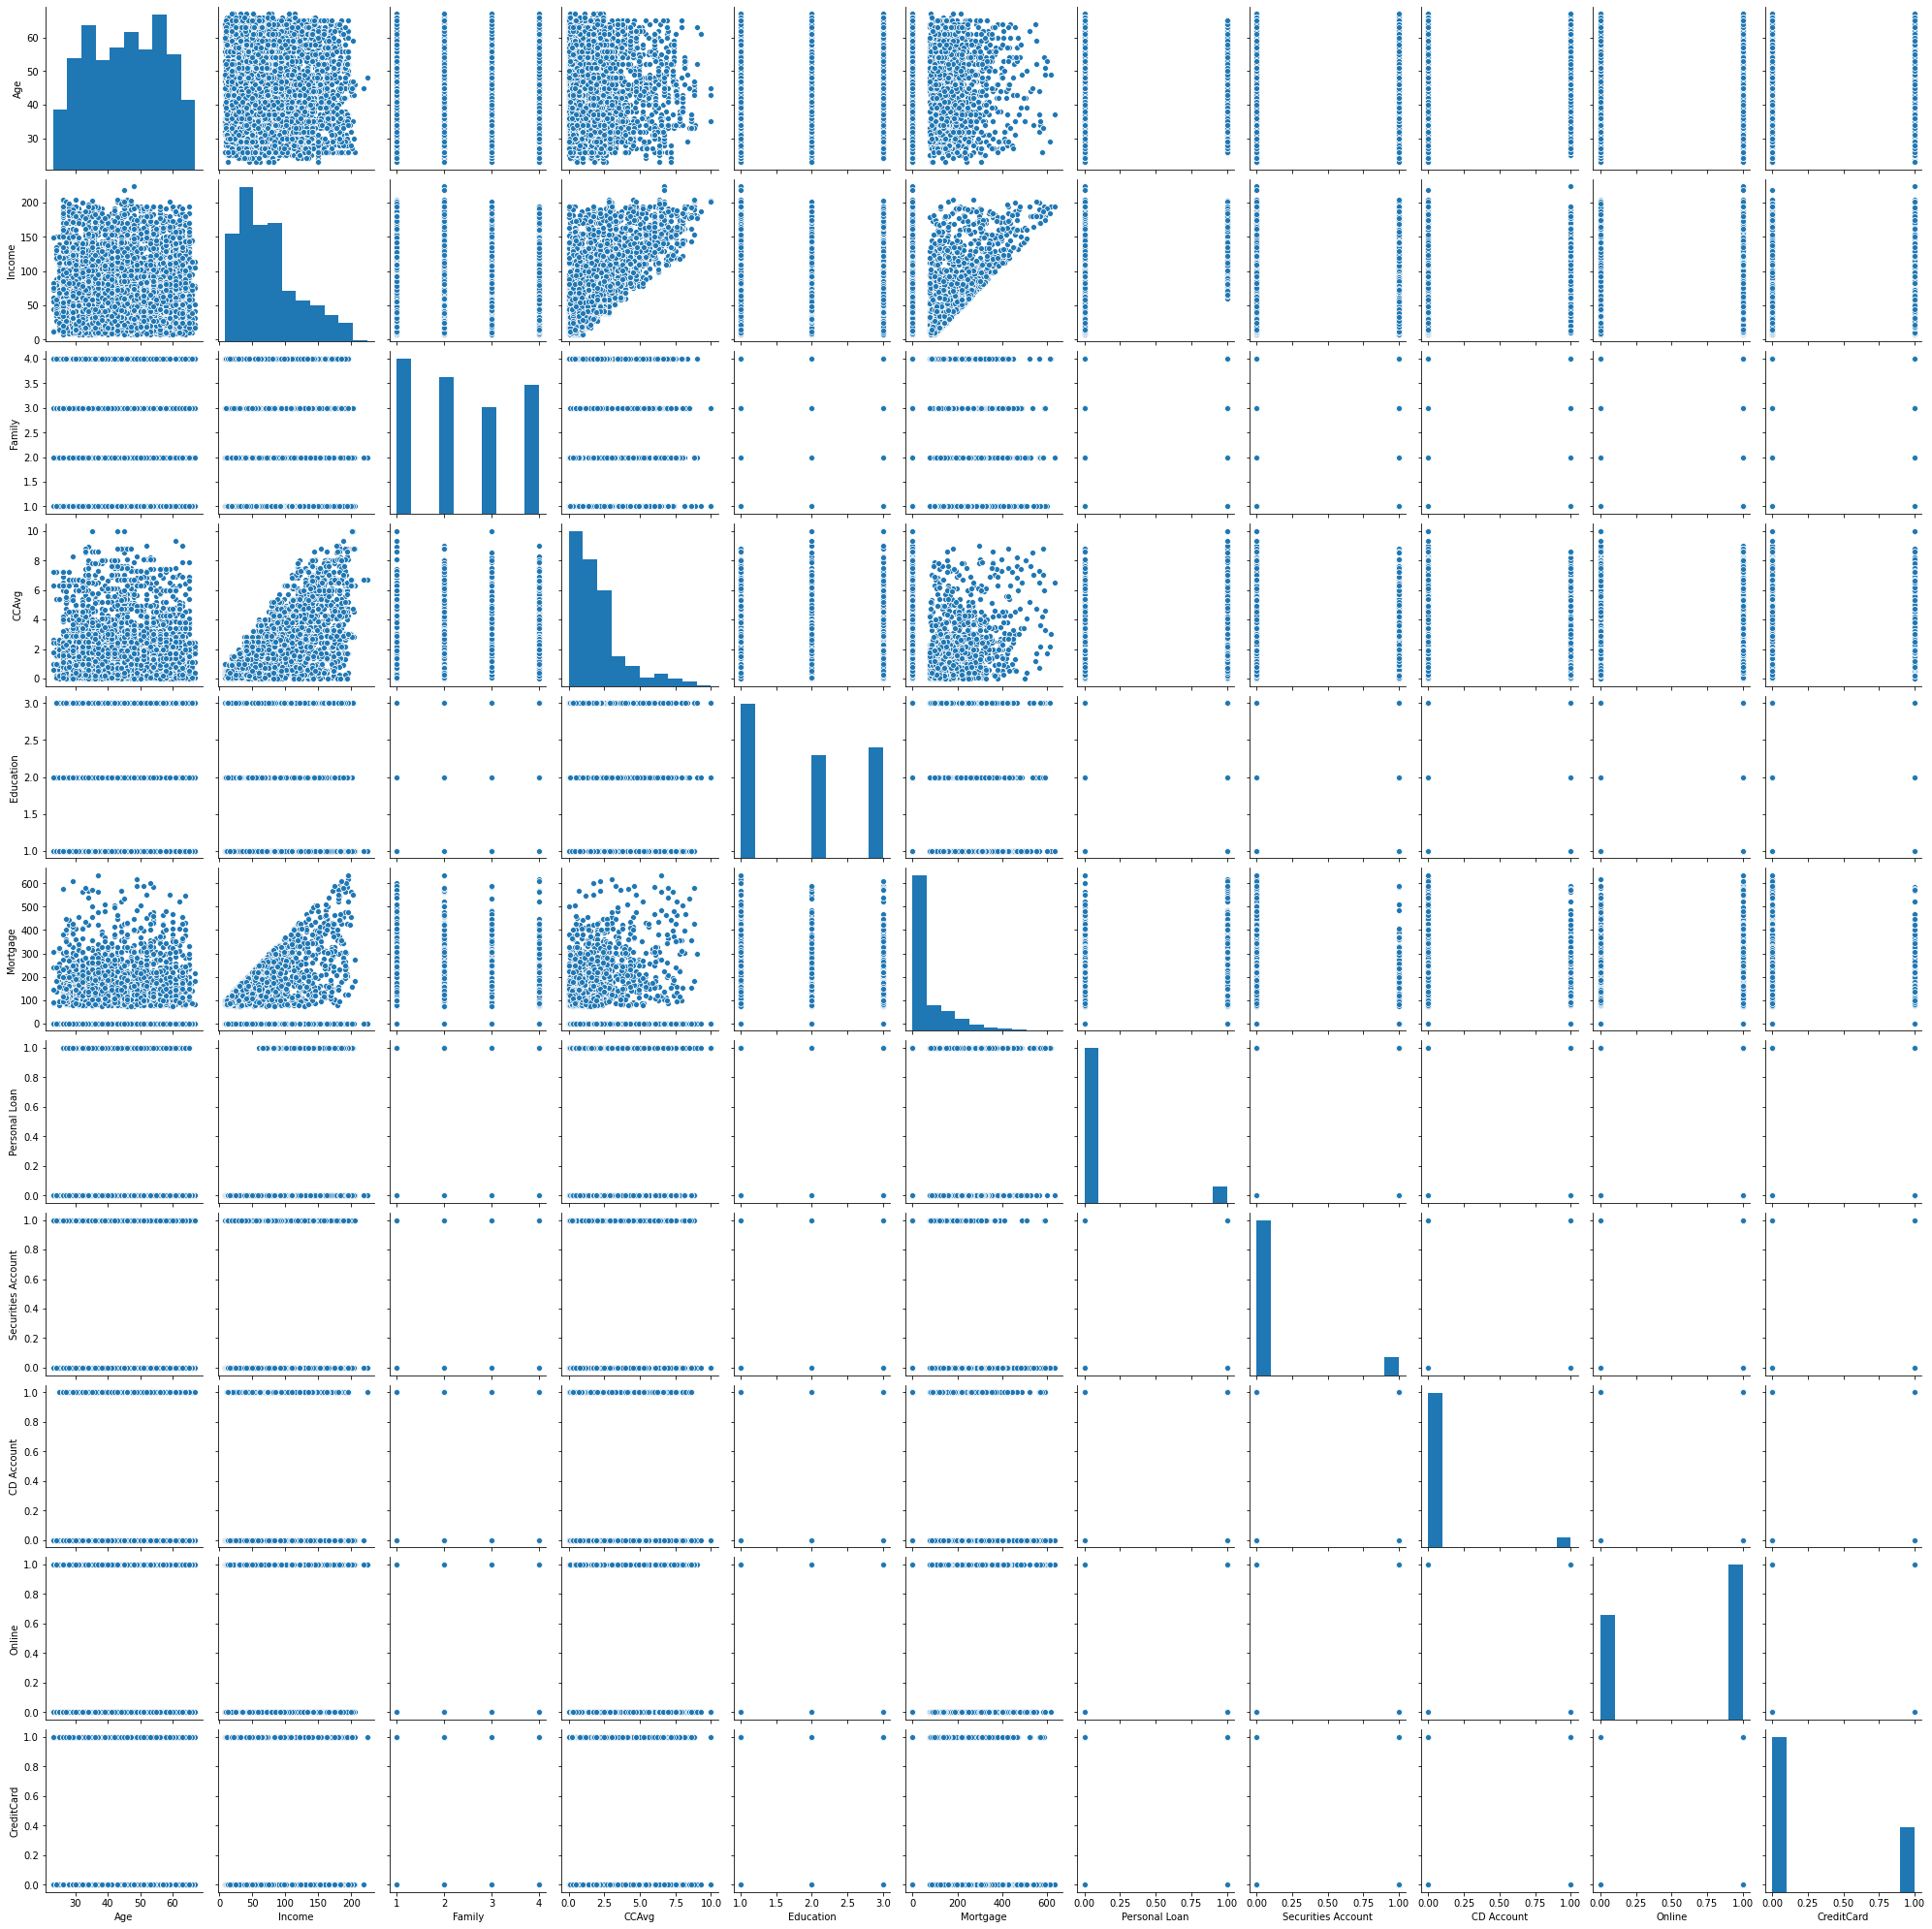

In [49]:
# pairplot which plots one variable with every other variable
sns.pairplot(data_set)

This pairplot explains that how each feature/attribute is related to another feature/attribute

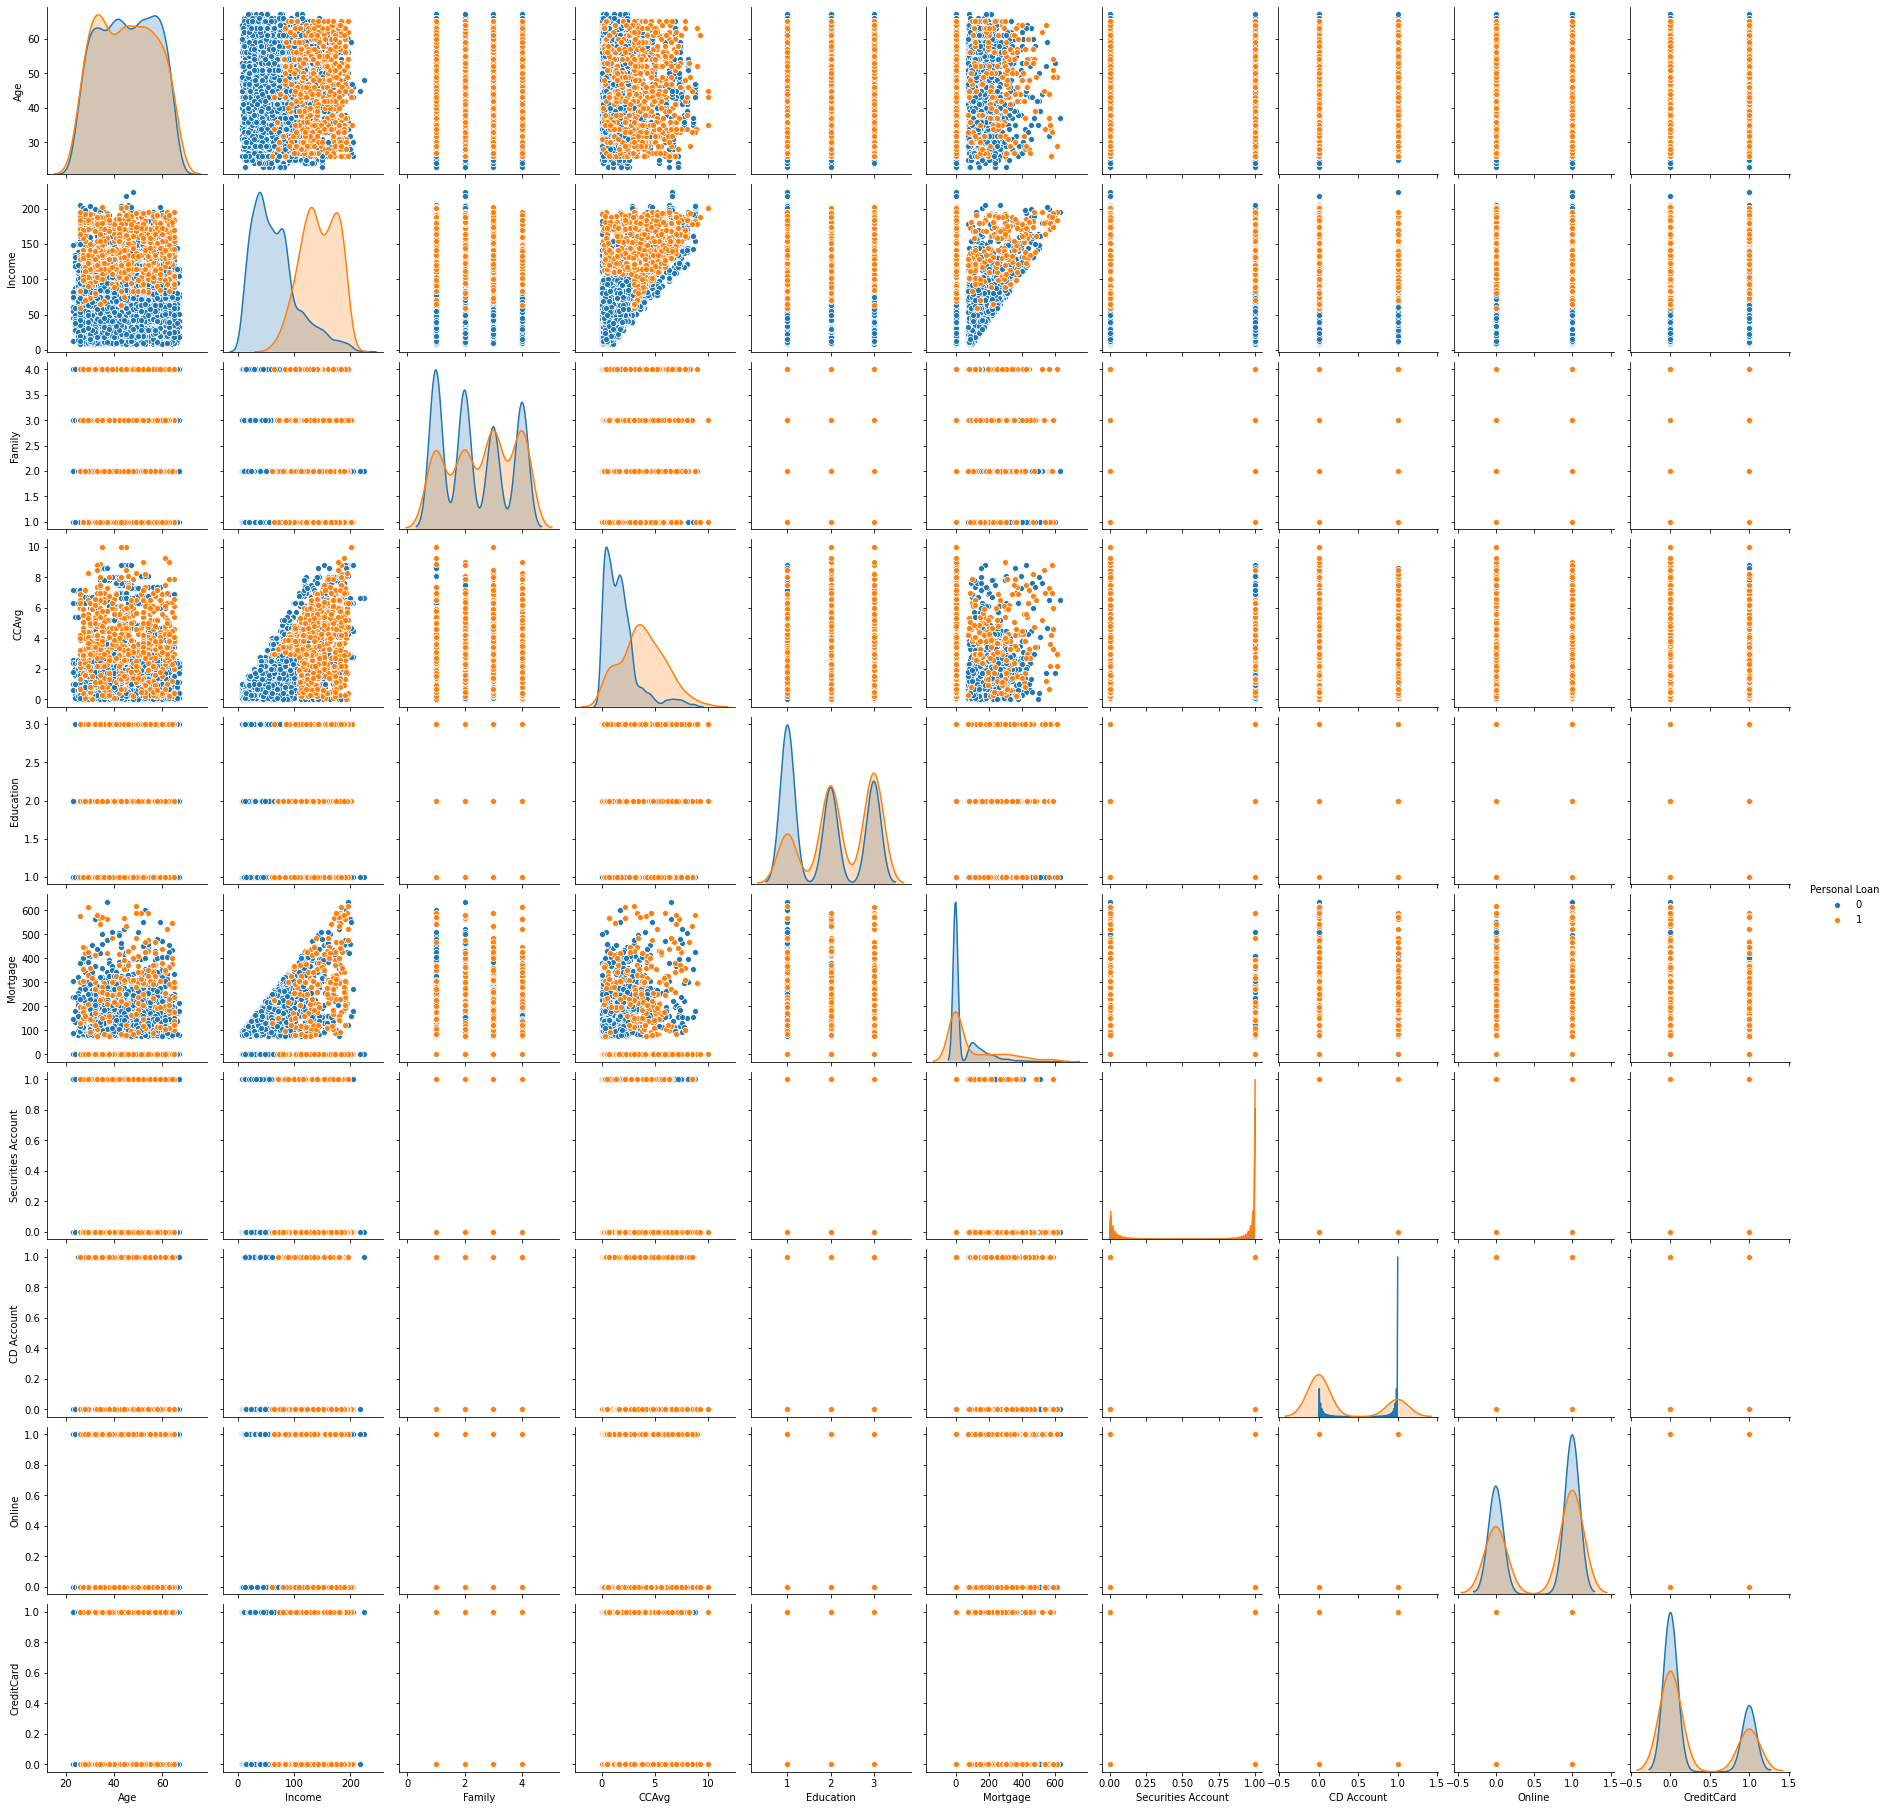

In [50]:
sns.pairplot(data_set,hue='Personal Loan')

Previous pairplot explains the relation between each attribute with other attribute but this pairplot explains the relation between each attributes but considering their influence over personal loan

#4. Transformation of Feature Variables

In [51]:
data_X=data_set.loc[:,data_set.columns != "Personal Loan"]
data_Y=data_set[["Personal Loan"]]

I am considering data_X contains the attributes other than target variable(i.e.,personal loan) whereas data_Y contains the target variable which is personal laon

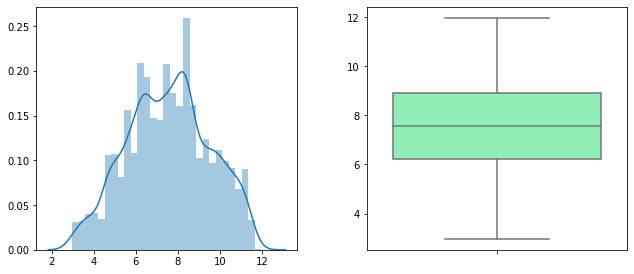

In [52]:
from sklearn.preprocessing import PowerTransformer

pt_income = PowerTransformer(method="yeo-johnson",standardize=False)
pt_income.fit(data_X["Income"].values.reshape(-1,1))
pt_i=pt_income.transform(data_X["Income"].values.reshape(-1,1))
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(pt_i,ax=axes[0]);
sns.boxplot(pt_i,orient="v",palette="rainbow",ax=axes[1]);
fig.tight_layout(pad=5.0)

We are applying PowerTransformer to make data more gaussian-like.It is used for modeling issues related to non-constant variance or situation where normality is used.Here we applied PowerTransformer method to Income.As we see that distribution of income is no longer skewed there are no outliers as well

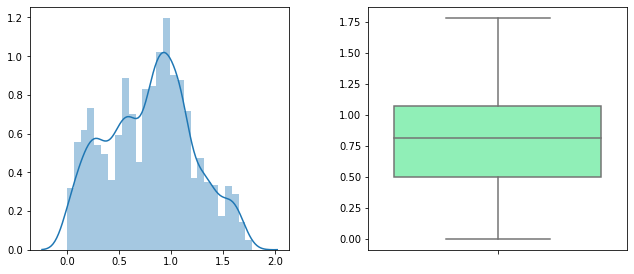

In [53]:
pt_CCAvg=PowerTransformer(method="yeo-johnson",standardize=False)
pt_CCAvg.fit(data_X["CCAvg"].values.reshape(-1,1))
pt_c=pt_CCAvg.transform(data_X["CCAvg"].values.reshape(-1,1)) 

fig, axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(pt_c,ax=axes[0]);
sns.boxplot(pt_c,orient="v",palette="rainbow",ax=axes[1]);
fig.tight_layout(pad=5.0)

We can see that compared to previous distribution this is symmetrical after using PowerTransformer and as it is no longer skewed there are no outliers as well

In [54]:
# We can not use PowerTransformer method in Mortgage because there is some discontinuity in the previous method.We can use bin
data_X["Mortgage_Int"]= pd.cut(data_X["Mortgage"],
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)

As we have already seen that mortgage is highly skewed there are lot of outliers present in this and as there is some discontinuity in this which means we cannot use PowerTransform method thatswhy we are using bin method for mortgage. 

In [55]:
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


# 5.Splitting Data Using Stratified Sampling

We cannot simply sample in this case.We have to split the data according to stratified sampling.

In [56]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(data_X, data_Y, test_size=0.3, stratify=data_Y, random_state=0)

In [57]:
train_X.reset_index(drop=True,inplace=True);
test_X.reset_index(drop=True,inplace=True);
train_Y.reset_index(drop=True,inplace=True);
test_Y.reset_index(drop=True,inplace=True);

In [58]:
train_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,24,3,0.4,1,0,0,1,1,0
1,64,35,1,1.5,2,1,0,0,0,0
2,52,31,4,1.8,1,0,0,1,1,0
3,32,20,1,0.5,3,0,0,1,0,1
4,62,54,1,0.8,1,1,0,0,1,0


# Standardising the Data

Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same
feature in X_train and X_test. This process is repeated for all features.

In [ ]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(train_X.columns):
    scaler = StandardScaler()

    # fit to train data
    scaler.fit(train_X[[column]])

    # transform train data
    np_array  = scaler.transform(train_X[[column]])
    train_X.loc[:,column] = pd.Series(np_array.flatten())

    #transform test data
    np_array = scaler.transform(test_X[[column]])
    test_X.loc[:,column] = pd.Series(np_array.flatten())


# Implementing Models

In [60]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#converting dataframes to numpy arrays
np_train_X=train_X.values
np_train_Y=train_Y.values
np_test_X=test_X.values
np_test_Y=test_Y.values

**Logistic Regression**

In [62]:
log = LogisticRegression(random_state=0)
# fit log on train_X and predict on test_X
log.fit(np_train_X,np_train_Y.ravel())
pred_log_test_X=log.predict(np_test_X) 
pred_log_train_X=log.predict(np_train_X)
acc_log_train_X=accuracy_score(np_train_Y,pred_log_train_X) 
acc_log_test_X=accuracy_score(np_test_Y,pred_log_test_X)
print("Logistic Regression accuracy on np_train_X:{:.4f}".format(acc_log_train_X)) 
print("Logistic Regression accuracy on np_test_X:{:.4f}".format(acc_log_test_X)) 

Logistic Regression accuracy on np_train_X:0.9520
Logistic Regression accuracy on np_test_X:0.9520


**Decision Tree Classifier**

In [63]:
dec = DecisionTreeClassifier(random_state=0,max_depth=8)
#fit dec on train_X and predict on test_X
dec.fit(np_train_X,np_train_Y.ravel())
pred_dec_test_X=dec.predict(np_test_X) 
pred_dec_train_X=dec.predict(np_train_X)
acc_dec_train_X=accuracy_score(np_train_Y,pred_dec_train_X) 
acc_dec_test_X=accuracy_score(np_test_Y,pred_dec_test_X)
print("decision tree classifier accuracy on np_train_X:{:.4f}".format(acc_dec_train_X)) 
print("decision tree classifier accuracy on np_test_X:{:.4f}".format(acc_dec_test_X))


decision tree classifier accuracy on np_train_X:0.9957
decision tree classifier accuracy on np_test_X:0.9813


**Random Forest Classifier**

In [64]:
ran = RandomForestClassifier(random_state=0,n_estimators=750,max_depth=8)
#fit ran on train_X and predict on test_X
ran.fit(np_train_X,np_train_Y.ravel())
pred_ran_test_X=ran.predict(np_test_X) 
pred_ran_train_X=ran.predict(np_train_X)
acc_ran_train_X=accuracy_score(np_train_Y,pred_ran_train_X) 
acc_ran_test_X=accuracy_score(np_test_Y,pred_ran_test_X)
print("random forest classifier accuracy on np_train_X:{:.4f}".format(acc_ran_train_X)) 
print("random forest classifier accuracy on np_test_X:{:.4f}".format(acc_ran_test_X))


random forest classifier accuracy on np_train_X:0.9951
random forest classifier accuracy on np_test_X:0.9873


**KNN- Classifier**

In [65]:
knn=KNeighborsClassifier(n_neighbors=18)
#fit knn on train_X and predict on test_X
knn.fit(np_train_X,np_train_Y.ravel())
pred_knn_test_X=knn.predict(np_test_X) 
pred_knn_train_X=knn.predict(np_train_X)
acc_knn_train_X=accuracy_score(np_train_Y,pred_knn_train_X) 
acc_knn_test_X=accuracy_score(np_test_Y,pred_knn_test_X)
print("KNN-Classifier accuracy on np_train_X:{:.4f}".format(acc_knn_train_X)) 
print("KNN-Classifier accuracy on np_test_X:{:.4f}".format(acc_knn_test_X))



KNN-Classifier accuracy on np_train_X:0.9491
KNN-Classifier accuracy on np_test_X:0.9487


# 7.Metrics related to Different models 

Logistic Regression Metrics

In [66]:
# function to get confusion matrix in a proper format
def draw_cn( actual,predicted):
    cn = confusion_matrix(actual,predicted)
    sns.heatmap(cn,annot=True,fmt='.2f',xticklabels= [0,1],yticklabels=[0,1])
    plt.xlabel('observed')
    plt.ylabel('predicted')
    plt.show()

In [67]:
np_test_Y.shape

(1500, 1)

Confusion Matrix


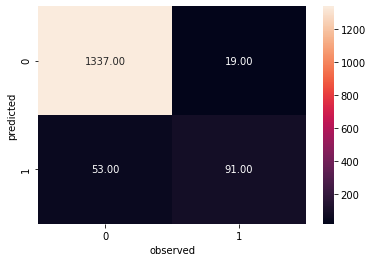

None


In [68]:
print('Confusion Matrix')
print(draw_cn(np_test_Y,pred_log_test_X.reshape(-1,1)))

 Confusion matrix is a table which describes the performance of a classification model.Every obsevation in the testing set is represented in exactly one box.It is a 2*2 matrix. True Positive: We correctly predicted that they are taking personal loan True Negative: We corretly predicted that they are not taking personal loan False positive: We incorrectly predicted that they are taking personal loan (Type-1 error) False Negative: We incorrectly predicted that they are not taking personal loan (Type-2 error)

In [69]:
print("Recall for logistic regression:",recall_score(np_test_Y,pred_log_test_X))
print("Precision for logistic regression:",precision_score(np_test_Y,pred_log_test_X))
print("Roc Auc Score for logistic regression:",roc_auc_score(np_test_Y,pred_log_test_X))
print("f1 score for logistic regression:",f1_score(np_test_Y,pred_log_test_X))

Recall for logistic regression: 0.6319444444444444
Precision for logistic regression: 0.8272727272727273
Roc Auc Score for logistic regression: 0.8089663225172075
f1 score for logistic regression: 0.7165354330708661


F1 score is used as comparision between precision and recall.Precision means the ratio of true postive/(true postive+false positive).Recall means ratio of true postive/(true positive +false negative).Roc Auc means Arean under the curve of Receiver Operator Characteristics


Decision Tree Metrics

Confusion Matrix


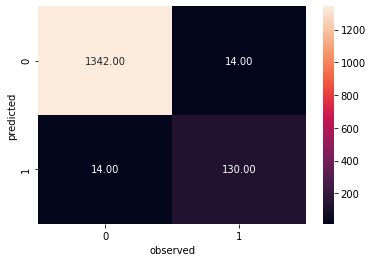

None


In [70]:
print('Confusion Matrix')
print(draw_cn(np_test_Y,pred_dec_test_X.reshape(-1,1)))

Confusion matrix is a table which describes the performance of a classification model.Every obsevation in the testing set is represented in exactly one box.It is a 2*2 matrix. True Positive: We correctly predicted that they are taking personal loan True Negative: We corretly predicted that they are not taking personal loan False positive: We incorrectly predicted that they are taking personal loan (Type-1 error) False Negative: We incorrectly predicted that they are not taking personal loan (Type-2 error)

In [71]:
print("Recall for decision tree classifier:",recall_score(np_test_Y,pred_dec_test_X))
print("Precision for decision tree classifier:",precision_score(np_test_Y,pred_dec_test_X))
print("Roc Auc Score for decision tree classifier:",roc_auc_score(np_test_Y,pred_dec_test_X))
print("f1 score for decision tree classifier:",f1_score(np_test_Y,pred_dec_test_X))

Recall for decision tree classifier: 0.9027777777777778
Precision for decision tree classifier: 0.9027777777777778
Roc Auc Score for decision tree classifier: 0.9462266470009832
f1 score for decision tree classifier: 0.9027777777777778


F1 score is used as comparision between precision and recall.Precision means the ratio of true postive/(true postive+false positive).Recall means ratio of true postive/(true positive +false negative).Roc Auc means Arean under the curve of Receiver Operator Characteristics

Random Forest Classifier

Confusion Matrix


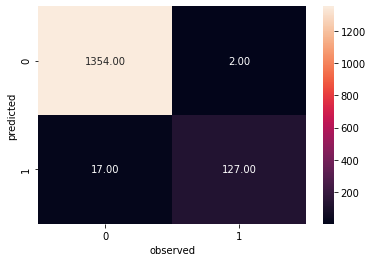

None


In [72]:
print('Confusion Matrix')
print(draw_cn(np_test_Y,pred_ran_test_X.reshape(-1,1)))

Confusion matrix is a table which describes the performance of a classification model.Every obsevation in the testing set is represented in exactly one box.It is a 2*2 matrix. True Positive: We correctly predicted that they are taking personal loan True Negative: We corretly predicted that they are not taking personal loan False positive: We incorrectly predicted that they are taking personal loan (Type-1 error) False Negative: We incorrectly predicted that they are not taking personal loan (Type-2 error)

In [73]:
print("Recall for random forest classifier:",recall_score(np_test_Y,pred_ran_test_X))
print("Precision for random forest classifer:",precision_score(np_test_Y,pred_ran_test_X))
print("Roc Auc Score for random forest classifier:",roc_auc_score(np_test_Y,pred_ran_test_X))
print("f1 score for random forest classifier:",f1_score(np_test_Y,pred_ran_test_X))

Recall for random forest classifier: 0.8819444444444444
Precision for random forest classifer: 0.9844961240310077
Roc Auc Score for random forest classifier: 0.9402347590953786
f1 score for random forest classifier: 0.9304029304029303


F1 score is used as comparision between precision and recall.Precision means the ratio of true postive/(true postive+false positive).Recall means ratio of true postive/(true positive +false negative).Roc Auc means Arean under the curve of Receiver Operator Characteristics

KNN-Classifier

COnfusion Matrix


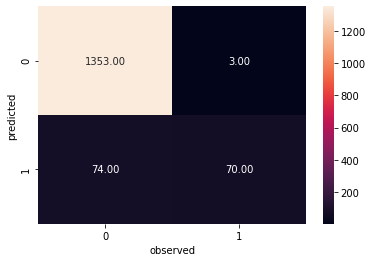

None


In [74]:
print('COnfusion Matrix')
print(draw_cn(np_test_Y,pred_knn_test_X.reshape(-1,1)))

Confusion matrix is a table which describes the performance of a classification model.Every obsevation in the testing set is represented in exactly one box.It is a 2*2 matrix. True Positive: We correctly predicted that they are taking personal loan True Negative: We corretly predicted that they are not taking personal loan False positive: We incorrectly predicted that they are taking personal loan (Type-1 error) False Negative: We incorrectly predicted that they are not taking personal loan (Type-2 error)

In [75]:
print("Recall for KNN-Classifier:",recall_score(np_test_Y,pred_knn_test_X))
print("Precision for KNN-Classifer:",precision_score(np_test_Y,pred_knn_test_X))
print("Roc Auc Score for KNN-Classifier:",roc_auc_score(np_test_Y,pred_knn_test_X))
print("f1 score for KNN-Classifier:",f1_score(np_test_Y,pred_knn_test_X))

Recall for KNN-Classifier: 0.4861111111111111
Precision for KNN-Classifer: 0.958904109589041
Roc Auc Score for KNN-Classifier: 0.7419493608652902
f1 score for KNN-Classifier: 0.6451612903225806


F1 score is used as comparision between precision and recall.Precision means the ratio of true postive/(true postive+false positive).Recall means ratio of true postive/(true positive +false negative).Roc Auc means Arean under the curve of Receiver Operator Characteristics

# 9.Business Understanding of the Models

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Initially we have loaded the data_set and we made sure that there are no null values or missing values.Then we started cleaning the data because our target varaible is Personal Loan and the feature variables that are not related to the target variables are not required.We can understand that ID(customer ID) is not required because it is not related to our target variable.So I have dropped it from my data_set.Now, I have checked if my data is having any false data and I identified that there are 52 negative values present in Experience Column.Now there are two possibilities.Either I can clean Experience column by replacing the faulty data in that or I can check whether Experience is highly correlated to any of the given attributes.I checked the heat map and then I understood that Age is Highly correlated with the experience and by this I removed Experience Column from my data_set.We even removed Zip-code from our data_set because when we found the unique values then we identified that Zip-Code has 467 unique values and if Zip-Code is not an ordinal variable but it is a nominal varaible.So it would be better if we remove the Zip-Code from our data_set otherwise training of models would be difficult because of multi-collinearity.After my univariate analysis I understood that Age is having Symmetrical distribution, Income,CCAvg are having right skewed distribution, Mortgage is highly skewed.After Multivariate analysis I understood that there is the customers whose education level is 1 is having more income.However customers who has taken personal loan have same income levels.Family size does not have any impact on personal loan.But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.Majority of customers who does not have loan has securities account.Customers who does not have CD account ,does not have loan as well.This seems to be majority. But almost all customers who has CD account has loan as well.It seems that customer who do not have personal loan and customer who has personal loan have high mortgage.Now we have to normalize some of the features such as Income,CCAvg and Mortgage because there is they are having skew distribitution and they may have outliers and if we normalize the data then there will not be any outliers.Income and CCAvg can be normalized by PowerTransformer but we cannot use it on the Mortgage because at some places it is discontinuous and instead of using PowerTransformer method we used bin method which is way more efficient than other methods and after using these methods we identified that the distribution is normalized and doesnot has outliers.After this I have done splitting of data using stratified sampling because in this problem statement we can not sample the data as usually.If we didn't use stratified sampling then our model may run but we need to get the right model.After splitting the data,we performed 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.After standardisation of data we have started using our models.This is a classification problem statement.I used 4 models.They are Logistic Regression,Decision Tree Classifier,Random Forest Classifier and KNN-Classifier.I have found the accuracy of both trained and tested data on all of the models.After this I analyzed different metrics such as F1 score,Confusion Matrix,Recall,Precision,Roc Auc Score.Now we have to start comparing and analyzing the algorithms.Classification accuracy is the easiest classification metric to understand.But,it doesnot tell you the underlying distribution of response vaalues(We examine by calculating the null accuracy).And it doesnot tell you what types of errors our classifier is making.Confusion matrix is a table which describes the performance of a classification model.Every obsevation in the testing set is represented in exactly one box.It is a 2*2 matrix.
True Positive: We correctly predicted that they are taking personal loan
True Negative: We corretly predicted that they are not taking personal loan
False positive: We incorrectly predicted that they are taking personal loan
                (Type-1 error)
False Negative: We incorrectly predicted that they are not taking personal loan
                (Type-2 error)

It is important for us to consider right model among the models we are using.According to Classification accuracy Random Forest Classifier is better.But, we also know that it is not the best way to check whether our model is right or not.We have to consider Confusion Matrix.If the Type-1 and Type-2 errors are lesser comparitive to other models then we can easily predict the better model.If we the cost of having the False negative is high then we have to increase model sensitivity and recall.
sensitivity means true positive/(true postive + false negative)
recall means true positive/(true positive + false negative) 

On the other hand if we cost of having the False Positive is high then we have to increase the model specificity and precision.So in this case there is cost of having False positive(incorrectly predicting people that they are taking loan) which is type-1 error.So we have to increase model specificity and precision.
Specificity means true negative/(true negative + false positive)
precision means true positive/(true postitve + false positive)
 
So we have to select the better model which has more precision and specificity.Which means lesser false positives.
Precision Values:-
logistic regession model: 0.82,
decision tree classifier model: 0.90,
random forest classifier model: 0.98,
KNN-Classifier model: 0.95,
This means better model among the four models is Random Forest Classifier. 